## 1. Requeriments

In [223]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [224]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader
import os

## 3. Graph building

### 3.1. Gene matrix

In [225]:
# os.chdir("../../../Sunitinib_Avelumab+Axitinib")

In [226]:
genes = pd.read_csv('Data/Preprocessed_data/Gene_Matrix/biogrid_included_genes_anova_10000_f_selection.csv')
Y = genes.Y

genes = genes.iloc[:,1:10000] 
genes


,A1BG,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADAT,AAED1,AAMDC,...,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM7,ZWILCH,ZWINT,ZXDA,ZYG11B,ZYX
0,2.91,10.78,0.01,0.01,7.18,6.22,4.38,3.86,2.77,4.42,...,0.01,2.73,4.40,4.23,3.72,3.18,3.96,3.82,4.12,8.23
1,2.26,9.77,0.01,1.25,6.16,6.61,5.14,2.61,1.97,3.71,...,0.01,2.96,3.84,3.40,3.06,3.31,2.95,4.11,4.20,8.26
2,2.41,10.49,0.01,0.28,6.90,6.51,4.44,3.09,2.44,3.73,...,0.01,2.45,4.62,2.48,3.50,3.04,3.78,4.33,4.00,8.44
3,1.13,9.45,0.01,0.01,6.77,6.27,4.31,1.91,3.02,4.98,...,0.01,2.44,3.92,3.42,3.69,1.95,2.25,3.91,4.04,8.38
4,0.91,8.11,0.01,0.01,6.47,5.90,4.11,3.16,2.28,4.69,...,0.01,1.74,4.82,0.01,4.34,2.63,2.21,4.30,4.47,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.29,9.15,0.01,0.29,7.16,6.24,4.81,2.08,2.35,3.60,...,0.01,2.11,4.52,3.57,3.84,1.61,2.54,3.43,3.67,8.25
350,2.76,9.95,0.01,4.02,7.07,6.14,3.32,3.29,3.43,4.66,...,0.01,2.14,5.00,3.24,4.16,2.89,3.24,4.16,4.00,8.97
351,1.13,8.37,0.01,0.01,6.72,6.21,5.04,2.03,3.39,3.93,...,0.01,0.92,3.32,0.54,3.05,3.42,3.35,3.15,3.61,9.07
352,1.74,8.96,0.01,0.01,5.98,6.16,5.75,2.14,2.61,3.95,...,0.01,3.40,4.63,2.82,3.23,3.01,3.77,4.44,4.34,7.93


In [227]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,A1BG,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADAT,AAED1,AAMDC,...,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM7,ZWILCH,ZWINT,ZXDA,ZYG11B,ZYX
0,0.273585,0.810757,0.0,0.000000,0.696043,0.517857,0.519789,0.685053,0.584570,0.696682,...,0.0,0.526042,0.406015,0.888421,0.736111,0.518041,0.666,0.321337,0.615658,0.464935
1,0.212264,0.609562,0.0,0.220641,0.512590,0.691964,0.720317,0.462633,0.347181,0.584518,...,0.0,0.585938,0.265664,0.713684,0.605159,0.551546,0.464,0.395887,0.644128,0.472727
2,0.226415,0.752988,0.0,0.048043,0.645683,0.647321,0.535620,0.548043,0.486647,0.587678,...,0.0,0.453125,0.461153,0.520000,0.692460,0.481959,0.630,0.452442,0.572954,0.519481
3,0.105660,0.545817,0.0,0.000000,0.622302,0.540179,0.501319,0.338078,0.658754,0.785150,...,0.0,0.450521,0.285714,0.717895,0.730159,0.201031,0.324,0.344473,0.587189,0.503896
4,0.084906,0.278884,0.0,0.000000,0.568345,0.375000,0.448549,0.560498,0.439169,0.739336,...,0.0,0.268229,0.511278,0.000000,0.859127,0.376289,0.316,0.444730,0.740214,0.402597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.120755,0.486056,0.0,0.049822,0.692446,0.526786,0.633245,0.368327,0.459941,0.567141,...,0.0,0.364583,0.436090,0.749474,0.759921,0.113402,0.382,0.221080,0.455516,0.470130
350,0.259434,0.645418,0.0,0.713523,0.676259,0.482143,0.240106,0.583630,0.780415,0.734597,...,0.0,0.372396,0.556391,0.680000,0.823413,0.443299,0.522,0.408740,0.572954,0.657143
351,0.105660,0.330677,0.0,0.000000,0.613309,0.513393,0.693931,0.359431,0.768546,0.619273,...,0.0,0.054688,0.135338,0.111579,0.603175,0.579897,0.544,0.149100,0.434164,0.683117
352,0.163208,0.448207,0.0,0.000000,0.480216,0.491071,0.881266,0.379004,0.537092,0.622433,...,0.0,0.700521,0.463659,0.591579,0.638889,0.474227,0.628,0.480720,0.693950,0.387013


In [228]:
train_genes, test_genes, Y_train, Y_test = train_test_split(genes, Y, test_size=0.1, stratify=Y)

### 3.2. Graph edges

In [229]:
path ='Graph_networks/Biogrid/Data/biogrid_minimum.edgelist'
G_initial = nx.read_edgelist(path)
G = G_initial.subgraph(genes.columns)
nx.write_edgelist(G, "Data/conected_graph.edgelist")
data = pd.read_csv("Data/conected_graph.edgelist", delimiter=' ')
edge_index1=data[data.columns[0]].to_numpy()
edge_index2=data[data.columns[1]].to_numpy()

In [230]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [231]:
edge_index

array(['FHL3', 'FHL3', 'FHL3', ..., 'UGT2A2', 'ZNF174', 'ZSCAN30'],
      dtype=object)

In [232]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

6084

In [233]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [234]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [235]:
edge_index

array([[1875, 1875, 1875, ..., 5675, 6073, 6073],
       [ 563, 1337, 1536, ..., 5674, 5939, 6071]])

In [236]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[1875, 1875, 1875,  ..., 5675, 6073, 6073],
        [ 563, 1337, 1536,  ..., 5674, 5939, 6071]])

### 3.3. Create dataset

In [237]:
train_data=[]
for g in range(len(train_genes)):
  b=[]
  for i in train_genes.iloc[g].to_numpy():
    a=[]
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float, requires_grad=True).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_train.iloc[g]], dtype=torch.float, requires_grad=True).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  train_data.append(data)

print(len(train_data))

318


In [238]:
test_data=[]
for g in range(len(test_genes)):
  b=[]
  for i in test_genes.iloc[g].to_numpy():
    a=[]
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float, requires_grad=True).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_test.iloc[g]], dtype=torch.float, requires_grad=True).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  test_data.append(data)

print(len(test_data))

36


In [239]:
data

Data(x=[9999, 1], edge_index=[2, 5083], y=[1, 1])

In [240]:
data.x

tensor([[0.1274],
        [0.4721],
        [0.0000],
        ...,
        [0.3316],
        [0.6050],
        [0.5844]], grad_fn=<ReshapeAliasBackward0>)

### 3.4. Patient sample

In [241]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of node features: {data.num_node_features}')


Number of nodes: 9999
Number of charcateristics per node: 1
Number of edges: 5083
Average node degree: 0.51
Has isolated nodes: True
Has self-loops: False
Is undirected: False
Number of node features: 1


## 4. Graph training

### 4.2. Training and testing the model

In [242]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU
from torch_geometric.nn import GINConv
from torch_geometric.nn import global_add_pool
from torch import nn

In [243]:
# class GIN(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(GIN, self).__init__()
#         self.conv1 = GINConv(
#             Sequential(Linear(1, dim_h),
#                        BatchNorm1d(dim_h), ReLU(),
#                        Linear(dim_h, dim_h), ReLU()))
#         self.conv2 = GINConv(
#             Sequential(Linear(dim_h, dim_h), 
#                        BatchNorm1d(dim_h), ReLU(),
#                        Linear(dim_h, dim_h), ReLU()))
#         self.conv3 = GINConv(
#             Sequential(Linear(dim_h, dim_h), 
#                        BatchNorm1d(dim_h), ReLU(),
#                        Linear(dim_h, dim_h), ReLU()))
#         self.lin1 = Linear(dim_h*3, dim_h*3)
#         self.lin2 = Linear(dim_h*3, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h1 = self.conv1(x, edge_index)
#         h2 = self.conv2(h1, edge_index)
#         h3 = self.conv3(h1, edge_index)

#         # Graph-level readout
#         h1 = global_add_pool(h1, batch)
#         h2 = global_add_pool(h2, batch)
#         h3 = global_add_pool(h3, batch)

#         # Concatenate graph embeddings
#         h = torch.cat((h1,h2,h3), dim=1)

#         # Classifier
#         h = self.lin1(h)
#         h = h.relu()
#         # h = F.dropout(h, p=0.5, training=self.training)
#         h = self.lin2(h)
#         m = nn.Sigmoid()
#         return m(h)


In [244]:
from sklearn.metrics import f1_score

def train(model, train_loader, optimizer, criterion):
    acc = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data.x, data.edge_index)
        loss = criterion(output, data.y)/ len(train_loader)
        acc = accuracy(torch.round(output), data.y)
        f1score = f1_score(data.y.detach().numpy(), torch.round(output).detach().numpy(), average='weighted')
        loss.backward()
        optimizer.step()
        # print(f'Train loss: {loss:.4f}, Train Acc: {acc:.4f}, Train f1-score: {f1score:.4f}')
        # print(data.y)
        # print(output)
    return loss, acc, f1score

    
@torch.no_grad()
def validation(model, val_loader, criterion):
    model.eval()
    acc = 0
    loss = 0
    for data in val_loader:
        output = model(data.x, data.edge_index)
        loss = criterion(output, data.y)/ len(val_loader)
        acc = accuracy(torch.round(output), data.y)
        f1score = f1_score(data.y, torch.round(output), average='weighted')
        # print(f'Val loss: {loss:.4f}, Val Acc: {acc:.4f}, Val f1-score: {f1score:.4f}')

    return loss, acc, f1score

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def test(model, test_data):
    acc = 0
    test_loader = DataLoader(test_data, batch_size=16, shuffle=False)
    for data in test_loader:
        output = model(data.x, data.edge_index)
        acc = accuracy(torch.round(output), data.y) / len(test_loader)
        f1score = f1_score(data.y.detach().numpy(), torch.round(output).detach().numpy(), average='weighted')
        print(f'Test Acc: {acc:.4f}, Test f1-score: {f1score:.4f}')
    return acc, f1score


In [245]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [246]:

from torch.nn import Linear, ReLU, Dropout
from torch_geometric.nn import Sequential, GCNConv, JumpingKnowledge
from torch_geometric.nn import global_mean_pool

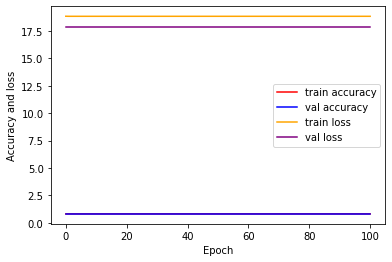

In [ ]:
plt.plot(train_epoch, color="red", label="train accuracy")
plt.plot(val_epoch, color="blue", label="val accuracy")
plt.plot(train_loss_, color="orange", label="train loss")
plt.plot(val_loss_, color="purple", label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and loss")
plt.legend()